In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import spacy


movies_df = pd.read_csv('./wiki_movie_plots_deduped.csv',
                           usecols=['Release Year', 'Title', 'Plot', 'Genre'])

movies_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Release Year  34886 non-null  int64 
 1   Title         34886 non-null  object
 2   Genre         34886 non-null  object
 3   Plot          34886 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


<Axes: ylabel='Genre'>

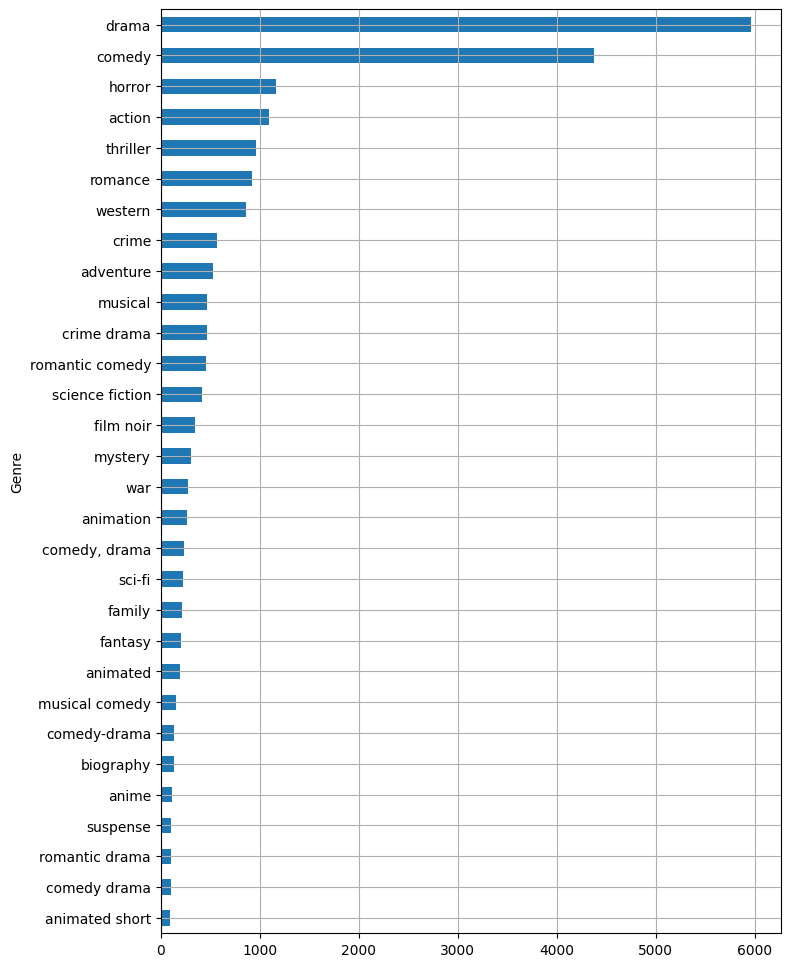

In [29]:
movies_df[movies_df["Genre"] != "unknown"].groupby(["Genre"]).size().sort_values(ascending=True).tail(30).plot.barh(figsize=(8, 12), grid=True)

In [30]:

# Check the number of rows and columns in the DataFrame
print("Number of rows:", movies_df.shape[0])
print("Number of columns:", movies_df.shape[1])

Number of rows: 34886
Number of columns: 4


In [31]:
def check_missing_values(df):
    # Count missing values in each column
    missing_values = df.isna().sum()

    # Calculate total missing values
    total_missing_values = missing_values.sum()
    
    # Calculate percentage of missing values
    percentage_missing_values = (total_missing_values / df.shape[0]) * 100

    # Return a dictionary with counts and percentages
    return {
        'Total missing values': total_missing_values,
        'Percentage missing values': percentage_missing_values
    }



In [32]:
# Print the results of the function
print(check_missing_values(movies_df))

{'Total missing values': 0, 'Percentage missing values': 0.0}


In [33]:
import certifi
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

print("Certificates installed successfully.")

Certificates installed successfully.


Below we have an example of word_tokenize and STOPWORDS result

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annilamunsaf/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


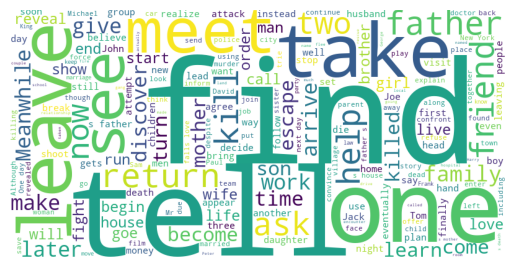

In [34]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

# Extract the movie plots
plots = movies_df['Plot']

# Remove stopwords from the plots
stop_words = set(STOPWORDS)

filtered_plots = []
for plot in plots:
    words = word_tokenize(plot)
    filtered_words = [word for word in words if word not in stop_words]
    filtered_plots.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_plots))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


Below we show STOPWORDS, and WordNetLemmatizer result

In [35]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer


def preprocess(text):
    result = []

    # Remove stopwords
    for token in gensim.utils.simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(token)

    # Remove tokens shorter than 3 characters
    result = [token for token in result if len(token) > 2]

    # Lemmatize remaining tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in result]

    return lemmatized_tokens

# Apply the preprocess function to the movie plots
preprocessed_documents = plots.map(preprocess)


preprocessed_documents.head()

0    [bartender, work, saloon, serve, drink, custom...
1    [moon, paint, smile, face, hang, park, night, ...
2    [film, minute, long, compose, shots, girl, sit...
3    [last, second, consist, shots, shoot, set, woo...
4    [earliest, know, adaptation, classic, fairytal...
Name: Plot, dtype: object

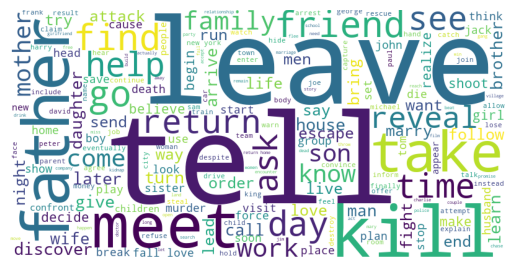

In [36]:

filtered_plots = []
for document in preprocessed_documents:
    filtered_words = [word for word in document]
    filtered_plots.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_plots))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [37]:
movies_df.head()


,Release Year,Title,Genre,Plot
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...


Here we apply directly to preprocess (Tokenize and remove stopwords, Remove tokens shorter than 3 characters, Lemmatize remaining tokens) movies_df ['Plot'] and save it in movies_df['Preprocessed_plot'] 

In [38]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess a list of words
def preprocess(text):
    
     # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in STOPWORDS]

    # Remove tokens shorter than 3 characters
    result = [token for token in filtered_tokens if len(token) > 2]

    # Lemmatize remaining tokens using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = ' '.join([lemmatizer.lemmatize(token, pos='v') for token in result])

    return lemmatized_tokens

# Apply the preprocess function to the 'plot' column
movies_df['Preprocessed_plot'] = movies_df['Plot'].apply(preprocess)


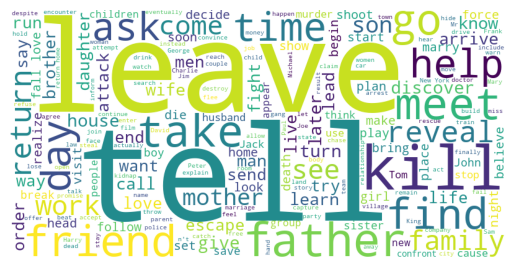

In [41]:
# Assuming you already have the 'Preprocessed_plot' column in movies_df
filtered_plots = movies_df['Preprocessed_plot'].tolist()

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_plots))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [42]:
movies_df.head()


,Release Year,Title,Genre,Plot,Preprocessed_plot
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr...",bartender work saloon serve drink customers fi...
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov...",moon paint smile face hang park night young co...
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed...",film minute long compose shots girl sit base a...
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...,Lasting second consist shots shoot set wood wi...
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...,earliest know adaptation classic fairytale fil...


Here we apply word2vec_model and cosine_similarity to see recommended movies

In [43]:
def generate_user_tokens(user_input_value):
    # Tokenize and filter out non-alphabetic tokens
    user_tokens = [token for token in word_tokenize(user_input_value.lower()) if token.isalpha()]
    return user_tokens

In [44]:
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader
import gensim.models
import gensim.downloader as api


# Load the pre-trained word embeddings from the extracted file
word2vec_model = api.load('word2vec-google-news-300')


# Function to calculate cosine similarity between two sets of embeddings
def calculate_cosine_similarity(embeddings1, embedding_user_input):
    if embeddings1 is not None and embedding_user_input is not None:
        return cosine_similarity([embeddings1], [embedding_user_input])[0][0]
    else:
        return None

# Function to aggregate word embeddings for a lemmatized plot
def aggregate_embeddings(lemmatized_plot, model):
    tokens = lemmatized_plot.split()
    # Filter out tokens that are not in the vocabulary of the Word2Vec model
    valid_tokens = [token for token in tokens if token in model.key_to_index]

    # Return the mean of the word embeddings for the valid tokens
    if valid_tokens:
        embeddings = [model[token] for token in valid_tokens]
        aggregated_embedding = sum(embeddings) / len(embeddings)
        return aggregated_embedding
    else:
        return None
    
    
    
# Assuming you have a DataFrame named movies_df with 'Preprocessed_plot' column
movies_df['plot_embeddings'] = movies_df['Preprocessed_plot'].apply(lambda lemmatized_plot: aggregate_embeddings(lemmatized_plot, word2vec_model))




In [45]:
movies_df.head()

,Release Year,Title,Genre,Plot,Preprocessed_plot,plot_embeddings
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr...",bartender work saloon serve drink customers fi...,"[0.042483013, 0.027220408, 0.013820569, 0.0363..."
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov...",moon paint smile face hang park night young co...,"[0.083433665, 0.0661074, 0.030057581, 0.067512..."
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed...",film minute long compose shots girl sit base a...,"[0.07686615, 0.07994917, 0.0060306126, 0.11227..."
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...,Lasting second consist shots shoot set wood wi...,"[0.033387836, 0.05792096, -0.010578055, 0.0428..."
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...,earliest know adaptation classic fairytale fil...,"[0.030683775, 0.048118476, -0.076822996, 0.054..."


In [46]:
user_input = "Alice follows a large white rabbit down a Rabbit-hole"
user_input_processed_tokens = preprocess(user_input)

user_input_embedding = aggregate_embeddings(' '.join(user_input_processed_tokens), word2vec_model)

movies_df['cosine_similarity'] = movies_df['plot_embeddings'].apply(lambda embeddings: calculate_cosine_similarity(embeddings, user_input_embedding))

In [47]:
# Sort the DataFrame based on 'cosine_similarity' in ascending order
movies_df_sorted = movies_df.sort_values(by='cosine_similarity', ascending=False)

# Retrieve the top 10 movies
top_10_movies = movies_df_sorted.head(10)

# Display the top 10 movies
top_10_movies[['Release Year', 'Title','Genre', 'Preprocessed_plot', 'cosine_similarity']]

,Release Year,Title,Genre,Preprocessed_plot,cosine_similarity
25016,1977,Jadu Tona,unknown,Bekar hai sab kich url=http //www.imdb.com/tit...,0.388322
13883,2001,K-PAX,drama,"claim extraterrestrial planet K-PAX 1,000 ligh...",0.327786
18038,2017,Noor Jahaan,romance,Noor Jahaan story young lovers Noor play Adrit...,0.320464
4129,1945,A Tale of Two Mice,animated,Babbit send Catstello cheese refrigerator put ...,0.298333
32791,2017,Vunnadhi Okate Zindagi,drama,story start Spain Abhi remember friends story ...,0.292590
12670,1996,Don't Be a Menace to South Central While Drink...,comedy,Ashtray Tray short send inner city live father...,0.291089
32705,2016,Lacchimdeviki O Lekkundi,comedy-thriller,Devi Lavanya work bank cashier smart Naveen Na...,0.287597
31837,1984,Srivariki Premalekha,unknown,comedy film revolve blind Love letter Prema Le...,0.283935
4590,1948,A-Lad-In His Lamp,animated,Bugs find Aladdin lamp dig rabbit hole believe...,0.283066
32605,2013,Uyyala Jampala,romance,film narrate protagonist film Soori Raj Tarun ...,0.281515


In [50]:
alice_titles = movies_df[movies_df['Title'].str.lower().str.contains("wonderland")]['Title']

# Print the titles
print(alice_titles)


5                           Alice in Wonderland
1451                        Alice in Wonderland
5292                        Alice in Wonderland
8516                         Alex in Wonderland
10314                       Alice in Wonderland
13303                      Next Stop Wonderland
14383                                Wonderland
15723                      Phoebe in Wonderland
15780                       Alice in Wonderland
20737                                Wonderland
21043                      Malice in Wonderland
21850    The Care Bears Adventure in Wonderland
22713                          Magic Wonderland
27880                       Alice in Wonderland
Name: Title, dtype: object


Applying technique='TF-IDF' on movies_df['Preprocessed_plot'] 

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_similarity_with_tfid(user_input_value, movie_df):
    # Preprocess user input
    preprocessed_user_input = preprocess(user_input_value)

    # Apply TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(movie_df['Preprocessed_plot'])

    # Vectorize user input
    user_vector = vectorizer.transform([preprocessed_user_input])

    # Calculate cosine similarity
    similarity_scores = cosine_similarity(user_vector, tfidf_matrix).flatten()

    # Add similarity scores to the DataFrame
    similarity_column = f'Similarity (TF-IDF)'
    movie_df[similarity_column] = similarity_scores

    # Sort by similarity scores in descending order
    movie_df = movie_df.sort_values(by=similarity_column, ascending=False)

    return movie_df[['Release Year', 'Title', similarity_column, 'Preprocessed_plot']]



In [52]:
user_input = "Alice follows a large white rabbit down a Rabbit-hole"
result_df = calculate_similarity_with_tfid(user_input, movies_df)
result_df.head(10)

,Release Year,Title,Similarity (TF-IDF),Preprocessed_plot
9129,1975,Coonskin aka Street Fight,0.550862,South Sampson local Preacherman plan bust frie...
5,1903,Alice in Wonderland,0.535879,Alice follow large white rabbit Rabbit-hole fi...
8594,1970,"Rabbit, Run",0.533249,Reading Pennsylvania high school basketball st...
8829,1972,Night of the Lepus,0.514827,Rancher Cole Hillman Rory Calhoun seek help co...
5292,1951,Alice in Wonderland,0.438691,riverbank Alice spot White Rabbit waistcoat pa...
10482,1986,The Adventures of the American Rabbit,0.432968,story begin birth Robert Rabbit Barry Gordon p...
10314,1985,Alice in Wonderland,0.431026,open Alice help Mother set table tea time than...
13589,1999,Winnie the Pooh: Seasons of Giving,0.364261,story begin Tigger want ski Winnie Pooh Piglet...
1451,1933,Alice in Wonderland,0.350165,Left govern snowy afternoon Alice sister appea...
21850,1987,The Care Bears Adventure in Wonderland,0.349051,Care-a-lot Care Bears visit White Rabbit uncle...


In [53]:
user_input = "harry wizard magic stone"
result_df = calculate_similarity_with_tfid(user_input, movies_df)
result_df.head(10)


,Release Year,Title,Similarity (TF-IDF),Preprocessed_plot
13862,2001,Harry Potter and the Sorcerer's Stone,0.387066,Albus Dumbledore Minerva McGonagall Rubeus Hag...
20781,2001,Harry Potter and the Philosopher's Stone,0.387066,Albus Dumbledore Minerva McGonagall Rubeus Hag...
5807,1953,The Bigamist,0.330090,Harry Edmond O'Brien Eve Graham Joan Fontaine ...
12956,1997,Deconstructing Harry,0.328407,night Lucy Judy Davis get taxi home author Har...
5882,1953,Houdini,0.316732,1890s young Harry Houdini Tony Curtis perform ...
13902,2001,Megiddo: The Omega Code 2,0.305164,Stone Alexander quiet boy years age mother die...
20723,1999,Parting Shots,0.304603,Harry Sterndale Chris Rea tell cancer weeks li...
5065,1950,The Breaking Point,0.302361,Harry Morgan John Garfield sport-fishing boat ...
13128,1997,Six Ways to Sunday,0.290516,Eighteen-year-old Harry Norman Reedus innocent...
5737,1952,The Snows of Kilimanjaro,0.283989,film begin open word Hemingway story Kilimanja...


In [54]:
user_input = """	Albus Dumbledore, Minerva McGonagall, and Rubeus Hagrid, professors of Hogwarts School of Witchcraft and Wizardry, deliver an orphaned infant named Harry Potter to his only remaining relatives, \
the Dursleys. Ten years later, Harry has been battling a disjointed life with the Dursleys, inadvertently causing an accident during a family outing, and begins receiving unsolicited letters by owls. Finally, \
Hagrid re-appears, and informs Harry that he is actually a wizard, and has been accepted into Hogwarts, against the Dursleys' wishes. He also tells Harry of the latter's past; \
Harry is the orphaned son of two wizards who met their demise at the hands of Lord Voldemort, a malevolent, all-powerful wizard, by a Killing Curse, with Harry being the only survivor in the chaos thus, \
leading to his fame in the wizarding world as "The Boy Who Lived". Hagrid takes Harry to Diagon Alley to purchase school supplies, then takes him to King's Cross station to board a train to the school. \
While on the train, Harry meets Ron Weasley and Hermione Granger. He also encounters Draco Malfoy, a spoiled child from a wealthy wizarding family, who eventually becomes Harry's biggest rival. \
At the school, the students assemble in the great hall, where Harry and all the other first-year students are sorted by The Sorting Hat between four houses: Gryffindor, Hufflepuff, Ravenclaw, and Slytherin. \
Harry is placed into Gryffindor along with Ron and Hermione. At Hogwarts, Harry begins learning wizardry and discovers more about his past and his parents. Harry is also recruited for \
Gryffindor's Quidditch team as a Seeker, which is rare for first-year students. While exploring the school one night, Harry and his friends discover a giant three-headed dog named \
Fluffy in a restricted area of the school. They later find out Fluffy is guarding the Philosopher's Stone, an item that can be used to grant its owner immortality. Harry suspects that potions teacher \
Severus Snape is trying to obtain the stone in order to return Voldemort to physical form. The children learn from Hagrid that Fluffy will fall asleep if played music. Harry, Ron, and Hermione \
decide to try and find the stone before Snape does, but discover someone has already put Fluffy to sleep. They get past Fluffy and face a series of safeguards, which include surviving a deadly plant known as \
Devil's Snare, a room filled with aggressive flying keys, and a dangerous life-sized game of chess. After getting past the tasks, Harry discovers that it was Defence Against the Dark Arts teacher \
Professor Quirrell who was trying to claim the stone, and that Snape was protecting Harry all along. Quirrell removes his turban and reveals a weak Voldemort to be living on the back of his head. \
Through an enchantment placed by Professor Dumbledore, Harry finds himself in possession of the stone. Voldemort attempts to convince Harry to give him the stone by promising to bring his parents back from the dead. \
When Harry refuses, Quirrell attacks, but Harry's touch burns Quirrell's skin and reduces him to dust, killing him. When Harry gets back up, Voldemort's spirit rises from Quirrell's ashes and passes through Harry,\
 knocking him unconscious. Harry wakes up in the school's hospital wing with Dumbledore at his side. Dumbledore explains that the stone has been destroyed and that Ron and Hermione are both fine. \
 Dumbledore also reveals how Harry was able to defeat Quirrel; when Harry's mother died to save him, her death gave Harry a love-based protection against Voldemort. Harry, Ron, and Hermione are rewarded \
 with house points for their heroic performances, tying them for first place with Slytherin. However, Neville Longbottom is awarded 10 points for attempting to stop his friends, giving Gryffindor enough points to win\
  the House Cup. Harry returns home for the summer, happy to finally have a real home in Hogwarts."""
result_df = calculate_similarity_with_tfid(user_input, movies_df)
result_df.head(10)

,Release Year,Title,Similarity (TF-IDF),Preprocessed_plot
13862,2001,Harry Potter and the Sorcerer's Stone,1.000000,Albus Dumbledore Minerva McGonagall Rubeus Hag...
20781,2001,Harry Potter and the Philosopher's Stone,1.000000,Albus Dumbledore Minerva McGonagall Rubeus Hag...
21140,2011,Harry Potter and the Deathly Hallows: Part II,0.634202,bury Dobby Harry Potter ask goblin Griphook he...
16040,2011,Harry Potter and the Deathly Hallows: Part 2,0.634202,bury Dobby Harry Potter ask goblin Griphook he...
15225,2007,Harry Potter and the Order of the Phoenix,0.590526,summer Aunt Petunia Uncle Vernon Harry Potter ...
21073,2010,Harry Potter and the Deathly Hallows: Part I,0.577941,Minister Magic Rufus Scrimgeour address wizard...
15845,2010,Harry Potter and the Deathly Hallows: Part 1,0.577941,Minister Magic Rufus Scrimgeour address wizard...
15648,2009,Harry Potter and the Half-Blood Prince,0.573478,Lord Voldemort tighten grip wizarding Muggle w...
14063,2002,Harry Potter and the Chamber of Secrets,0.561504,Harry Potter spend summer Dursleys receive let...
14667,2005,Harry Potter and the Goblet of Fire,0.526955,Harry Potter awaken nightmare Frank Bryce kill...


Here we add inverted index and apply on the movie dataset using TFID and cosine simmilarity

In [55]:
from collections import defaultdict
def create_inverted_index(df):
    inverted_index = defaultdict(list)

    for idx, row in df.iterrows():
        preprocessed_plot = preprocess(row['Plot'])
        tokens = word_tokenize(preprocessed_plot)
        
        for token in set(tokens):
            inverted_index[token].append(idx)

    return inverted_index

In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_similarity_with_tfid_using_inverted_index(user_input_value, movie_df, inverted_index):
    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
      
      # Preprocess user input
    preprocessed_user_input = preprocess(user_input_value)
 
 
     # Retrieve relevant indices from inverted index
    user_tokens = word_tokenize(preprocessed_user_input)
    relevant_indices = set(idx for token in user_tokens for idx in inverted_index.get(token, []))

    # Extract corresponding rows from the DataFrame
    relevant_movies = movie_df.loc[list(relevant_indices)].reset_index(drop=True)

   # Fit the vectorizer on the relevant subset of the data
    vectorizer.fit(relevant_movies['Preprocessed_plot'])
    # Vectorize user input
    user_vector = vectorizer.transform([preprocessed_user_input])

    # Calculate similarity using TF-IDF
    similarity_scores = cosine_similarity(user_vector, vectorizer.transform(relevant_movies['Preprocessed_plot'])).flatten()

    # Add similarity scores to the DataFrame
    similarity_column = f'Similarity (TF-IDF)'
    relevant_movies[similarity_column] = similarity_scores

    # Sort by similarity scores in descending order
    relevant_movies = relevant_movies.sort_values(by=similarity_column, ascending=False)

    return relevant_movies[['Release Year', 'Title', similarity_column, 'Preprocessed_plot']]



In [59]:
# Inverted Indexing
inverted_index_list = create_inverted_index(movies_df)
user_input = "harry wizard magic stone"
result_df = calculate_similarity_with_tfid_using_inverted_index(user_input, movies_df, inverted_index_list)
result_df.head(10)

,Release Year,Title,Similarity (TF-IDF),Preprocessed_plot
154,2001,Harry Potter and the Philosopher's Stone,0.567255,Albus Dumbledore Minerva McGonagall Rubeus Hag...
752,2001,Harry Potter and the Sorcerer's Stone,0.567255,Albus Dumbledore Minerva McGonagall Rubeus Hag...
855,1953,Houdini,0.513315,1890s young Harry Houdini Tony Curtis perform ...
456,2007,Harry Potter and the Order of the Phoenix,0.450929,summer Aunt Petunia Uncle Vernon Harry Potter ...
300,2010,Harry Potter and the Deathly Hallows: Part I,0.430737,Minister Magic Rufus Scrimgeour address wizard...
718,2010,Harry Potter and the Deathly Hallows: Part 1,0.430737,Minister Magic Rufus Scrimgeour address wizard...
815,2011,Harry Potter and the Deathly Hallows: Part 2,0.421956,bury Dobby Harry Potter ask goblin Griphook he...
333,2011,Harry Potter and the Deathly Hallows: Part II,0.421956,bury Dobby Harry Potter ask goblin Griphook he...
173,2005,Harry Potter and the Goblet of Fire,0.379849,Harry Potter awaken nightmare Frank Bryce kill...
246,2007,Magicians,0.360923,Harry Kane Karl Allen best friends work succes...


In [60]:
user_input = "Alice follows a large white rabbit down a Rabbit-hole"
result_df = calculate_similarity_with_tfid_using_inverted_index(user_input, movies_df, inverted_index_list)
result_df.head(10)

,Release Year,Title,Similarity (TF-IDF),Preprocessed_plot
2983,1975,Coonskin aka Street Fight,0.512192,South Sampson local Preacherman plan bust frie...
2,1903,Alice in Wonderland,0.485649,Alice follow large white rabbit Rabbit-hole fi...
2868,1972,Night of the Lepus,0.476778,Rancher Cole Hillman Rory Calhoun seek help co...
3485,1986,The Adventures of the American Rabbit,0.402170,story begin birth Robert Rabbit Barry Gordon p...
3420,1985,Alice in Wonderland,0.400106,open Alice help Mother set table tea time than...
1837,1951,Alice in Wonderland,0.389776,riverbank Alice spot White Rabbit waistcoat pa...
764,1933,Alice in Wonderland,0.310015,Left govern snowy afternoon Alice sister appea...
7359,1987,The Care Bears Adventure in Wonderland,0.304572,Care-a-lot Care Bears visit White Rabbit uncle...
2361,1959,The Rabbit Trap,0.291197,leave army years ago Eddie work hard promotion...
6807,1978,Watership Down,0.289764,According Adams Lapine language culture mythol...
